In [12]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  
import sys

sys.path.append('../')
sys.path.append('D:/Programmation/3I026')

In [13]:
# Par exemple:
data_2D = pd.read_csv("data/base-2D.csv")
print("Il y a", len(data_2D), "exemples dans la base.")

Il y a 14 exemples dans la base.


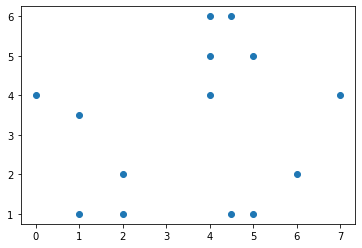

In [14]:
M_data2D= data_2D.values           # conversion du DataFrame en matrice pour la commande suivante
colonne_X= M_data2D[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= M_data2D[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y)  # affichage des points

In [15]:
data_2D

X    Y
0   0.0  4.0
1   1.0  3.5
2   1.0  1.0
3   2.0  1.0
4   2.0  2.0
5   4.0  4.0
6   4.0  5.0
7   4.0  6.0
8   4.5  1.0
9   4.5  6.0
10  5.0  1.0
11  5.0  5.0
12  6.0  2.0
13  7.0  4.0

## Fonctions préliminaires

### Normalisation des données

In [16]:
def normalisation(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    
    return normalized_df

norm = normalisation(data_2D)
norm

X    Y
0   0.000000  0.6
1   0.142857  0.5
2   0.142857  0.0
3   0.285714  0.0
4   0.285714  0.2
5   0.571429  0.6
6   0.571429  0.8
7   0.571429  1.0
8   0.642857  0.0
9   0.642857  1.0
10  0.714286  0.0
11  0.714286  0.8
12  0.857143  0.2
13  1.000000  0.6

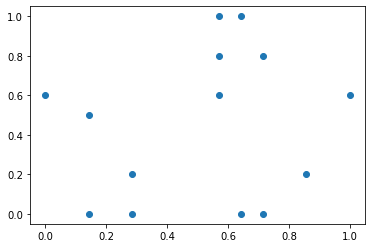

In [17]:
M_data2DNorm= norm.values      # conversion du DataFrame en matrice pour la commande suivante
colonne_X= M_data2DNorm[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= M_data2DNorm[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y)  # affichage des points

### Distances entre exemples

In [18]:
def dist_euclidienne_vect(V1,V2):
    size1 = len(V1)
    size2 = len(V2)
    
    dist = 0
    if(size1 == size2):
        for i in range(size1):
            dist += (V1[i] - V2[i])**2
            
    return dist**0.5


In [19]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2DNorm[0,:]
v2= M_data2DNorm[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance euclidienne entre v1 et v2 : ", dist_euclidienne_vect(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance euclidienne entre v1 et v2 :  0.17437936593905287


In [20]:
def dist_manhattan_vect(V1,V2):
    size1 = len(V1)
    size2 = len(V2)
    
    dist = 0
    if(size1 == size2):
        for i in range(size1):
            dist += abs(V1[i] - V2[i])
            
    return dist


In [21]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2DNorm[0,:]
v2= M_data2DNorm[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance de Manhattan entre v1 et v2 : ", dist_manhattan_vect(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance de Manhattan entre v1 et v2 :  0.24285714285714283


In [22]:
def dist_vect(mode,v1,v2):
    if(mode == "euclidienne"):
        return dist_euclidienne_vect(v1,v2)
    if(mode == "manhattan"):
        return dist_manhattan_vect(v1,v2)
    

In [23]:
v1= M_data2DNorm[0,:]
v2= M_data2DNorm[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

for nom in ["euclidienne", "manhattan"] :
    print("distance ", nom, " entre v1 et v2 :\t", dist_vect(nom,v1,v2))


v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance  euclidienne  entre v1 et v2 :	 0.17437936593905287
distance  manhattan  entre v1 et v2 :	 0.24285714285714283


### Calcul de centroides

In [24]:
def centroide(matrix):
    shape = matrix.shape
    centroide = []
    
    if(len(shape) == 1):
        return matrix
    
    for i in range(shape[1]):
        moyenne = 0
        for j in range(shape[0]):
            moyenne += matrix[j][i]
        centroide.append(moyenne / shape[0])
        
    return np.array(centroide)

In [25]:
M_data2DNorm

array([[0.        , 0.6       ],
       [0.14285714, 0.5       ],
       [0.14285714, 0.        ],
       [0.28571429, 0.        ],
       [0.28571429, 0.2       ],
       [0.57142857, 0.6       ],
       [0.57142857, 0.8       ],
       [0.57142857, 1.        ],
       [0.64285714, 0.        ],
       [0.64285714, 1.        ],
       [0.71428571, 0.        ],
       [0.71428571, 0.8       ],
       [0.85714286, 0.2       ],
       [1.        , 0.6       ]])

In [26]:
centroide(M_data2DNorm)

array([0.51020408, 0.45      ])

### Distances entre groupes d'exemples


La distance entre deux groupes d'exemples correspond à la distance entre leurs centroïdes (approche "centroid linkage").

In [27]:
def dist_groupes(mode,gr1,gr2):
    # print(gr1,gr2)
    if(mode == "euclidienne"):
        return dist_euclidienne_vect(centroide(gr1),centroide(gr2))
    if(mode == "manhattan"):
        return dist_manhattan_vect(centroide(gr1),centroide(gr2))

In [28]:
# par exemple :
dist_groupes("euclidienne", M_data2DNorm[0:4], M_data2DNorm[5:13])

0.5863454787138408

## L'algorithme de classification hiérarchique

Dans la suite de cet exercice, une partition (qui est un groupe de clusters) est représentée par une structure de données de type dictionnaire (<code>dict()</code> en python) :
- la clé est un numéro de cluster (sous la forme d'un entier naturel) ;
- la valeur associée est une matrice contenant les exemples qui sont dans le cluster correspondant.

On appelle "partition" un tel dictionnaire.


In [29]:
def initialise(matrix):
    dictionnaire = dict()
    shape = matrix.shape
    for i in range (shape[0]):
        dictionnaire[i] = matrix[i,:]
    return dictionnaire

In [30]:
# Par exemple:
depart = initialise(M_data2DNorm)
# cette partition contient autant de clusters que d'exemples: on a un cluster par exemple.
depart 

{0: array([0. , 0.6]),
 1: array([0.14285714, 0.5       ]),
 2: array([0.14285714, 0.        ]),
 3: array([0.28571429, 0.        ]),
 4: array([0.28571429, 0.2       ]),
 5: array([0.57142857, 0.6       ]),
 6: array([0.57142857, 0.8       ]),
 7: array([0.57142857, 1.        ]),
 8: array([0.64285714, 0.        ]),
 9: array([0.64285714, 1.        ]),
 10: array([0.71428571, 0.        ]),
 11: array([0.71428571, 0.8       ]),
 12: array([0.85714286, 0.2       ]),
 13: array([1. , 0.6])}

### Variante 1: chaînage par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'utilisation d'un chaînage par centroides (approche "centroid linkage").

On commence par implémenter une fonction qui, étant donné une partition, permet de regrouper les 2 clusters les plus proches. Ces 2 clusters sont alors fusionnés pour n'en former qu'un seul qui est ajouté à la partition, alors que les 2 clusters initiaux sont retirés de la partition.
On fait l'hypothèse que la partition initiale contient au moins 2 groupes.

La fonction <code>fusionne</code> qui prend en argument un nom de distance ("euclidienne" ou "manhattan") et une partition C0 et qui rend 4 valeurs :
- la partition C1 obtenue après fusion des 2 clusters les plus proches ;
- les clés des 2 clusters de C0 qui ont été fusionnés et qui ont donc aussi été retirés de C1 ;
- la distance qui séparait ces 2 clusters, calculée selon le nom de distance donné.

In [31]:
import math
def fusionne(mode,dictionnaire):
    if(len(dictionnaire)>=2):
        
        indiceGr1 = 0
        indiceGr2 = 1
        distMin = math.inf
        
        
        for i in dictionnaire:
            for j in dictionnaire:
                if(i!=j):
                    distTemp = dist_groupes(mode,dictionnaire[i],dictionnaire[j])
                    if(distMin > distTemp):
                        indiceGr1 = i
                        indiceGr2 = j
                        distMin = distTemp
        
        newDictionnaire = dictionnaire.copy()
        
        v1 = dictionnaire[indiceGr1]
        v2 = dictionnaire[indiceGr2]
        
        newIndice = max(list(dictionnaire.keys())) + 1
        newDictionnaire[newIndice] = np.vstack( [v1,v2])
        
        del newDictionnaire[indiceGr1]
        del newDictionnaire[indiceGr2]
        
        
        # print("Fusion de ",indiceGr1, " et ",indiceGr2," pour la distance min : ", distMin)
        
        return newDictionnaire,indiceGr1,indiceGr2,distMin
    else:
        return dictionnaire

In [32]:
# Par exemple:
depart = initialise(M_data2DNorm)
fusionne("euclidienne",depart)  

({0: array([0. , 0.6]),
  1: array([0.14285714, 0.5       ]),
  2: array([0.14285714, 0.        ]),
  3: array([0.28571429, 0.        ]),
  4: array([0.28571429, 0.2       ]),
  5: array([0.57142857, 0.6       ]),
  6: array([0.57142857, 0.8       ]),
  7: array([0.57142857, 1.        ]),
  9: array([0.64285714, 1.        ]),
  11: array([0.71428571, 0.8       ]),
  12: array([0.85714286, 0.2       ]),
  13: array([1. , 0.6]),
  14: array([[0.64285714, 0.        ],
         [0.71428571, 0.        ]])},
 8,
 10,
 0.0714285714285714)

### Construction de dendrogramme

Le dendrogramme permet de visualiser les fusions de clusters réalisés tout au long du déroulement de l'algorithme de clustering hiérarchique.

Pour construire un dendrogramme, il est nécessaire de construire la matrice suivante (que l'on appelle <code>M_Fusion</code> dans ce qui suit): pour chaque ligne, cette matrice contient 4 colonnes :
- les 2 premières colonnes contiennent les clés des groupes fusionnés ;
- la 3e colonne contient la distance qui séparait ces 2 groupes ;
- la 4e colonne contient la valeur 2 (c'est une valeur sans importance pour nous).
 

In [33]:
# Exemple de construction de la matrice M_Fusion en utilisant les fonctions écrites
# dans les questions précédentes

# initialisation 
courant = initialise(M_data2DNorm)       # clustering courant, au départ:s données data_2D normalisées
M_Fusion = []                        # initialisation
while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
    new,k1,k2,dist_min = fusionne('euclidienne',courant)
    if(len(M_Fusion)==0):
        M_Fusion = [k1,k2,dist_min,2]
    else:
        M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
    courant = new
    
print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)


La matrice M_Fusion obtenue :
 [[ 8.         10.          0.07142857  2.        ]
 [ 7.          9.          0.07142857  2.        ]
 [ 2.          3.          0.14285714  2.        ]
 [ 6.         11.          0.14285714  2.        ]
 [ 0.          1.          0.17437937  2.        ]
 [15.         17.          0.20316375  2.        ]
 [ 4.         16.          0.21237241  2.        ]
 [12.         14.          0.26811892  2.        ]
 [ 5.         19.          0.30474563  2.        ]
 [13.         22.          0.45428571  2.        ]
 [20.         21.          0.5         2.        ]
 [18.         24.          0.63813966  2.        ]
 [23.         25.          0.67968424  2.        ]]


Une fois la matrice <code>M_Fusion</code> construite, le tracé d'un histogramme s'effectue avec le code suivant :

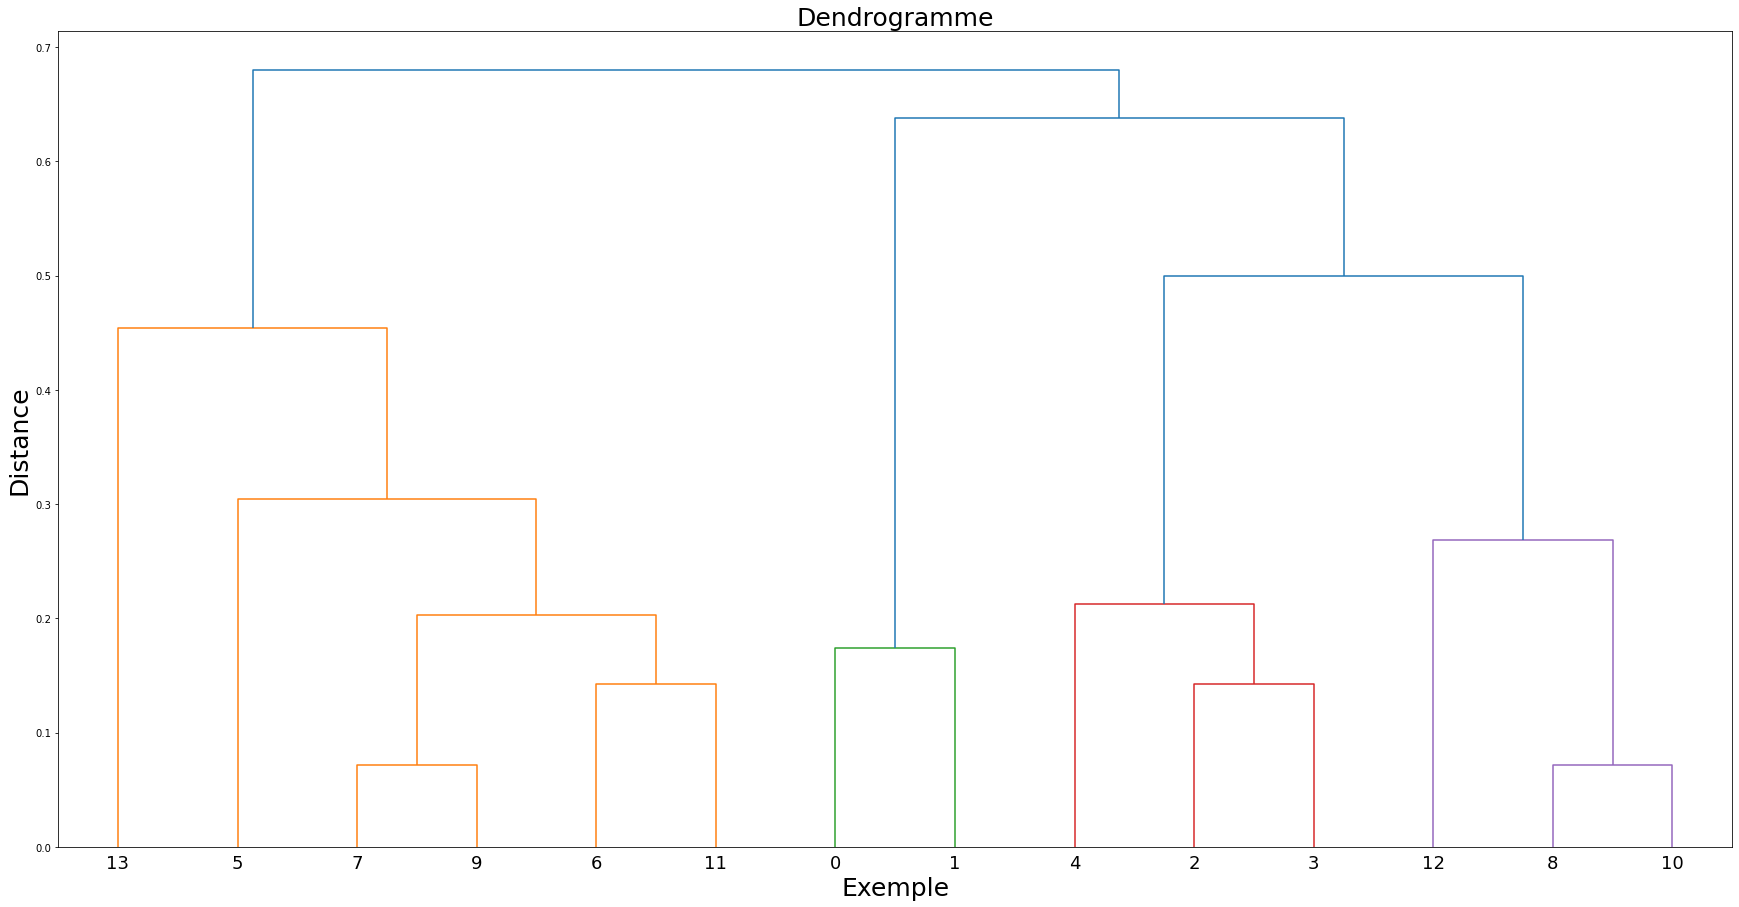

In [34]:
import scipy.cluster.hierarchy

# Paramètre de la fenêtre d'affichage: 
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme', fontsize=25)    
plt.xlabel('Exemple', fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme à partir de la matrice M_Fusion:
scipy.cluster.hierarchy.dendrogram(
    M_Fusion,
    leaf_font_size=18.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu:
plt.show()

La fonction <code>clustering_hierarchique</code> pour une base d'apprentissage et un nom de distance donné, permet de réaliser un clustering hiérarchique et de tracer le dendrogramme obtenu.

La fonction rend la matrice <code>M_Fusion</code> construite.

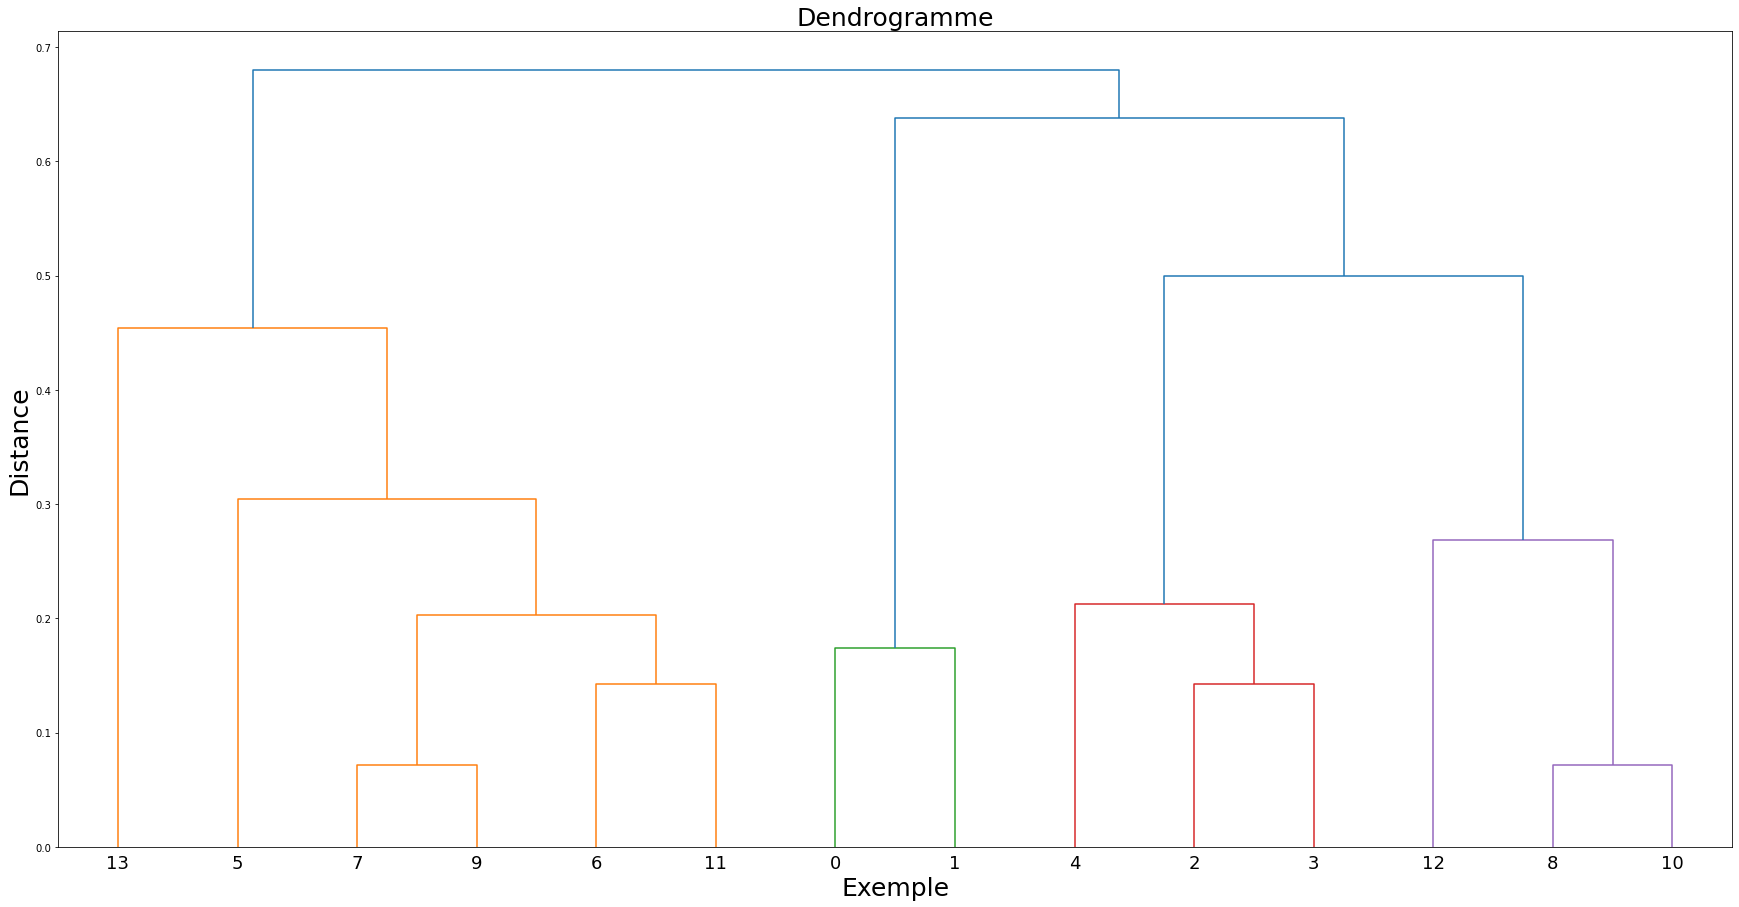

In [36]:
def clustering_hierarchique(mode,theset):
    norm = normalisation(theset)
    M_data2DNorm= norm.values
    # initialisation 
    courant = initialise(M_data2DNorm)       # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_min = fusionne('euclidienne',courant)
        if(len(M_Fusion)==0):
            M_Fusion = [k1,k2,dist_min,2]
        else:
            M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
        courant = new


    # Paramètre de la fenêtre d'affichage: 
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        M_Fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )

    # Affichage du résultat obtenu:
    plt.show()
    
clustering_hierarchique("euclidienne",data_2D)

### Comparaison de distances

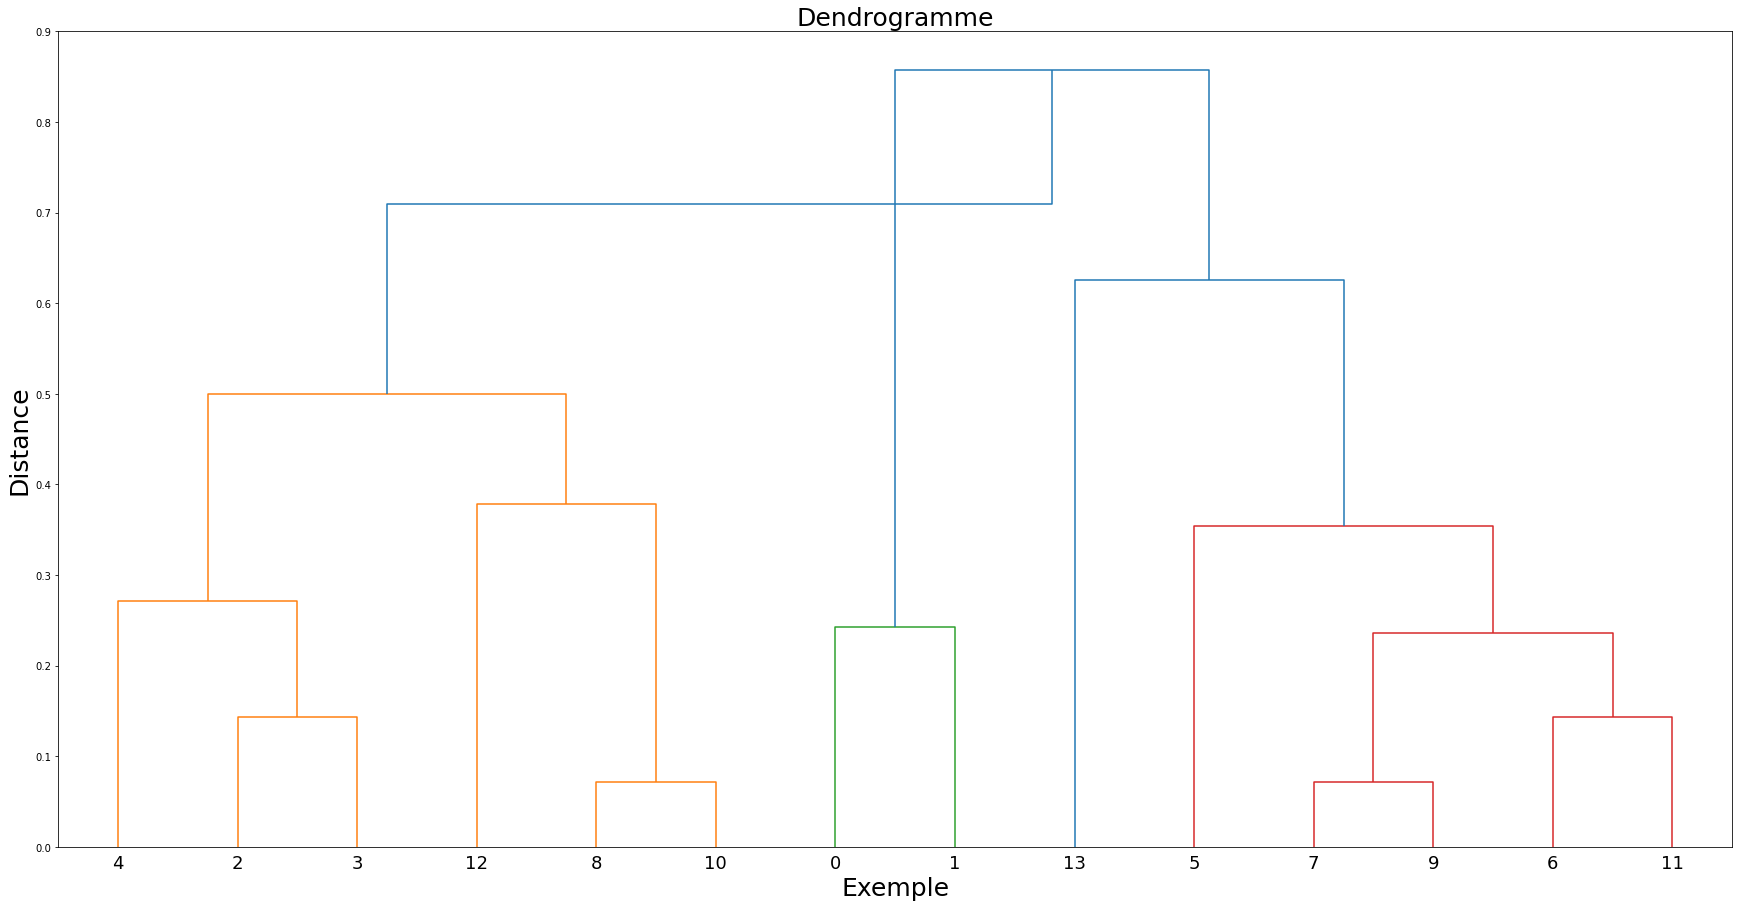

In [38]:
def clustering_hierarchique(mode,theset):
    norm = normalisation(theset)
    M_data2DNorm= norm.values
    # initialisation 
    courant = initialise(M_data2DNorm)       # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_min = fusionne(mode,courant)
        if(len(M_Fusion)==0):
            M_Fusion = [k1,k2,dist_min,2]
        else:
            M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
        courant = new


    # Paramètre de la fenêtre d'affichage: 
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        M_Fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )

    # Affichage du résultat obtenu:
    plt.show()
    
clustering_hierarchique("manhattan",data_2D)

### Variante 2: chaînage complet (maximum des distances)

On considère maintenant l'approche "complete linkage". 

Fonction <code>dist_max_groupes</code> qui, étant donné deux clusters, calcule leur distance ainsi définie. Cette fonction prend 3 arguments: un nom de distance à utiliser ("euclidienne" ou "manhattan") et deux clusters.
On fait l'hypothèse que les 2 clusters contiennent au moins un exemple.


In [39]:
def dist_max_groupes(mode,gr1,gr2):
    distMax = -math.inf
    
    shape1 = gr1.shape
    shape2 = gr2.shape    
    
    
    for i in gr1:
        for j in gr2:
            if(len(shape1) == 1):
                v1 = gr1
            else:
                v1 = i
            if(len(shape2) == 1):
                v2 = gr2
            else:
                v2 = j
            distTemp = dist_vect(mode,v1,v2) 
            if (distTemp > distMax):
                distMax = distTemp
    return distMax

In [40]:
dist_max_groupes("euclidienne", M_data2DNorm[0:5], M_data2DNorm[6:13])

1.118033988749895

La distance <code>dist_max_groupes</code> est utilisée lors d'un clustering hiérarchique basé sur un chaînage complet.


In [41]:
import math
def fusionneMax(mode,dictionnaire):
    if(len(dictionnaire)>=2):
        
        indiceGr1 = 0
        indiceGr2 = 1
        distMin = math.inf
        
        
        for i in dictionnaire:
            for j in dictionnaire:
                if(i!=j):
                    distTemp = dist_max_groupes(mode,dictionnaire[i],dictionnaire[j])
                    if(distMin > distTemp):
                        indiceGr1 = i
                        indiceGr2 = j
                        distMin = distTemp
        
        newDictionnaire = dictionnaire.copy()
        
        v1 = dictionnaire[indiceGr1]
        v2 = dictionnaire[indiceGr2]
        
        
        newIndice = max(list(dictionnaire.keys())) + 1
        newDictionnaire[newIndice] = np.vstack( [v1,v2])
        
        del newDictionnaire[indiceGr1]
        del newDictionnaire[indiceGr2]
        
        
        # print("Fusion de ",indiceGr1, " et ",indiceGr2," pour la distance min : ", distMin)
        
        return newDictionnaire,indiceGr1,indiceGr2,distMin
    else:
        return dictionnaire

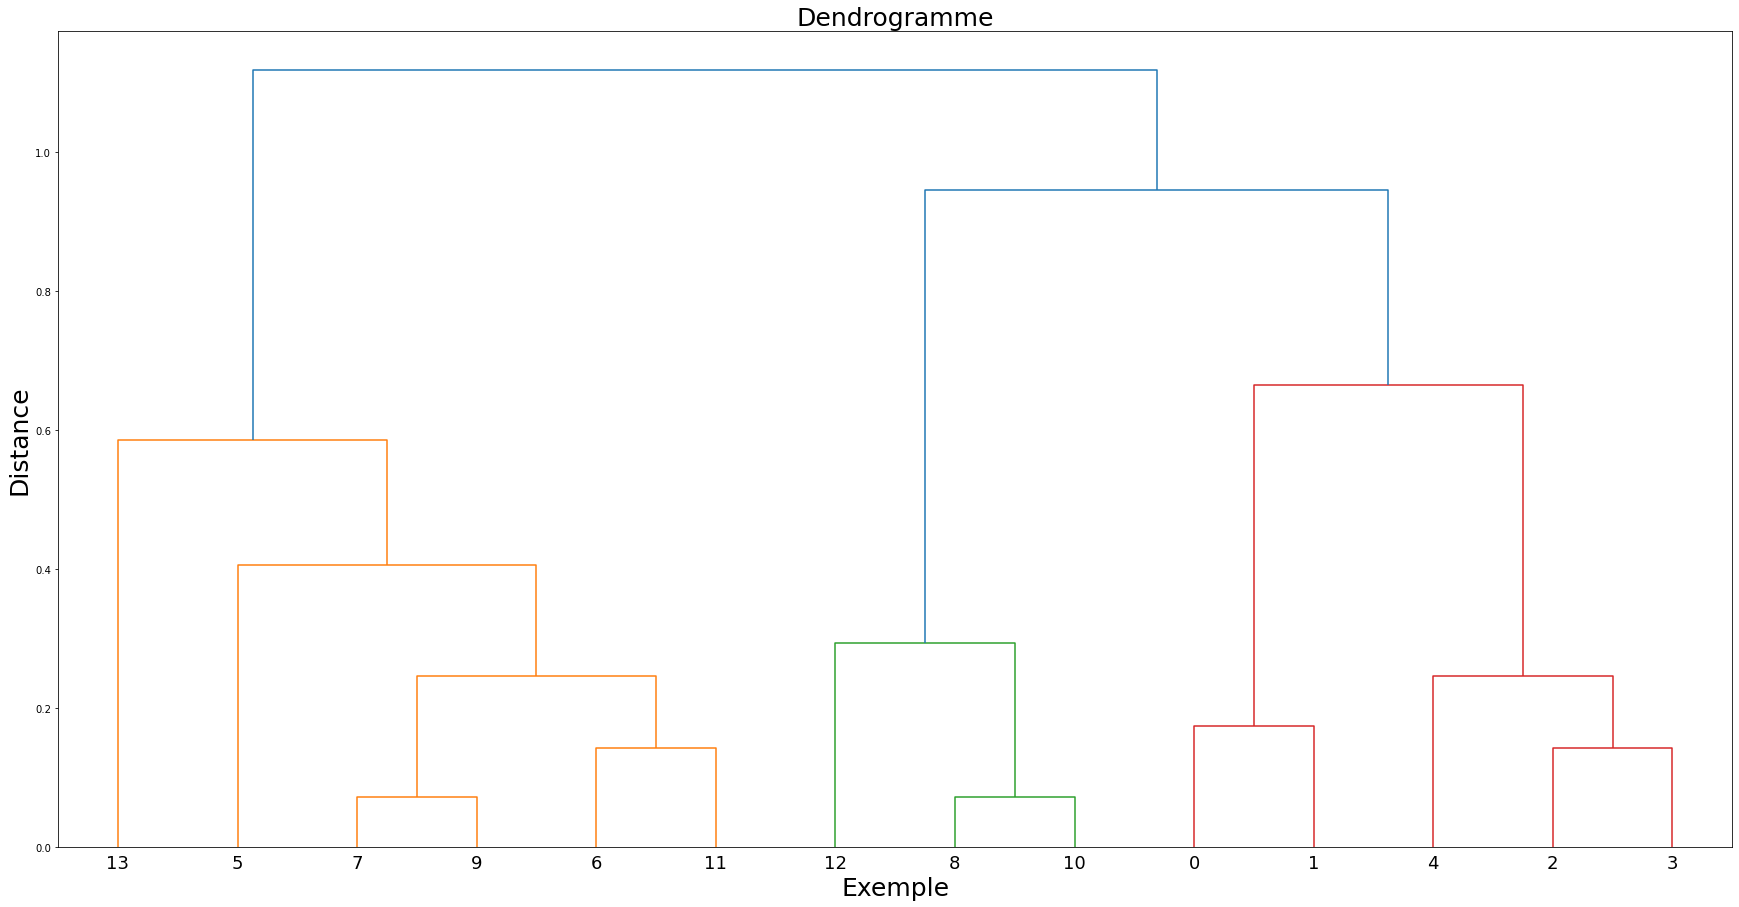

In [62]:
def clustering_hierarchique_distMax(mode,theset):
    norm = normalisation(theset)
    M_data2DNorm= norm.values
    # initialisation 
    courant = initialise(M_data2DNorm)       # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_min = fusionneMax(mode,courant)
        if(len(M_Fusion)==0):
            M_Fusion = [k1,k2,dist_min,2]
        else:
            M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
        courant = new


    # Paramètre de la fenêtre d'affichage: 
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        M_Fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )

    # Affichage du résultat obtenu:
    plt.show()
    
clustering_hierarchique_distMax("euclidienne",data_2D)

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

In [48]:
import sys

sys.path.append('../')
dataFile = open("./data/paris_dechet.csv","r")

In [49]:
data_Paris = pd.read_csv(dataFile,delimiter=';')

In [50]:

data_Paris.head(-1)

GranularitÃ©  janv-11  fÃ©vr-11  mars-11  avr-11  mai-11  juin-11  juil-11  \
0         75007    288.1     249.1    303.7   255.8   287.8    288.4    249.6   
1         75013    596.5     540.2    618.5   558.6   595.9    581.7    539.2   
2         75014    464.0     404.9    465.3   420.2   405.3    446.0    412.9   
3         75015    903.1     801.4    937.5   835.5   876.8    888.6    628.8   
4         75017    451.1     412.4    491.6   422.7   363.6    446.4    409.5   
5         75018    427.0     394.3    455.2   419.9   458.3    456.6    418.0   
6         75019    323.4     287.3    350.3   317.8   336.9    340.7    311.6   
7         75002    153.0     125.8    136.6   126.6   133.2    127.6    126.7   
8         75004    116.3     115.7    133.4   115.0   123.2    120.5    114.5   
9         75008    252.6     246.7    252.9   232.5   199.4    236.4    175.4   
10        75012    484.2     445.9    517.0   452.0   402.0    488.0    456.0   
11        75016    584.1     571.2    684.7   590.3   563.4    666.3    570.4   
12        75020    394.1     366.3    422.7   367.1   273.5    381.7    353.4   
13    ToutParis   7134.2    6462.6   7517.4  6656.6  6563.4   7063.0   6220.2   
14        75001     75.3      60.4     71.2    59.5    73.9     72.0     57.9   
15        75005    247.0     211.0    251.0   218.0   185.0    224.0    213.3   
16        75006    222.0     189.0    218.0   192.0   180.0    199.0    171.8   
17        75010    273.0     248.6    292.2   255.2   284.3    267.3    246.6   
18        75011    487.2     422.2    491.0   437.0   466.0    443.0    373.5   
19        75003    183.9     173.1    204.2   183.0   203.2    181.9    191.2   

    aoÃ»t-11  sept-11  oct-11  nov-11  dÃ©c-11  Total arrondissement 2011  
0      185.6    281.3   284.3   296.4    301.1                        NaN  
1      490.5    597.8   575.7   580.5    601.4                        NaN  
2      348.7    449.3   446.3   453.1    484.3                        NaN  
3      674.8    913.3   878.7   895.7    935.8                        NaN  
4      332.3    416.4   451.5   475.1    513.5                        NaN  
5      361.8    464.6   453.4   478.5    470.9                        NaN  
6      281.0    345.6   335.6   367.0    354.5                        NaN  
7      114.3    144.3   145.1   129.5    129.8                        NaN  
8       97.6    130.5   123.0   124.3    133.7                        NaN  
9      189.4    266.6   230.3   257.7    224.4                        NaN  
10     409.0    506.0   495.0   493.0    502.0                        NaN  
11     433.2    679.7   656.1   662.6    699.9                        NaN  
12     297.0    414.0   350.0   410.6    410.0                        NaN  
13    5464.0   7296.3  7084.6  7291.7   7492.8                        NaN  
14      56.4     75.5    75.7    65.8     79.1                        NaN  
15     162.9    203.4   232.1   227.6    251.6                        NaN  
16     134.8    183.1   195.5   213.8    204.1                        NaN  
17     210.3    280.6   275.6   284.6    283.2                        NaN  
18     367.5    511.9   490.6   469.2    487.9                        NaN  
19     153.6    208.6   186.5   192.9    189.9                        NaN

In [55]:
new_data_Paris = data_Paris.copy()

#TOUT PARIS = 0.0
new_data_Paris["GranularitÃ©"][13] = "00000"
new_data_Paris = new_data_Paris.sort_values(by=['GranularitÃ©'])
data_Paris_NoArr = new_data_Paris.drop(["GranularitÃ©"],axis=1)


new_data_Paris = new_data_Paris.astype('float')
new_data_Paris["Total arrondissement 2011"] = data_Paris_NoArr.sum(axis = 1)

new_data_Paris

C:\Programmation\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


GranularitÃ©  janv-11  fÃ©vr-11  mars-11  avr-11  mai-11  juin-11  \
13           0.0   7134.2    6462.6   7517.4  6656.6  6563.4   7063.0   
14       75001.0     75.3      60.4     71.2    59.5    73.9     72.0   
7        75002.0    153.0     125.8    136.6   126.6   133.2    127.6   
19       75003.0    183.9     173.1    204.2   183.0   203.2    181.9   
8        75004.0    116.3     115.7    133.4   115.0   123.2    120.5   
15       75005.0    247.0     211.0    251.0   218.0   185.0    224.0   
16       75006.0    222.0     189.0    218.0   192.0   180.0    199.0   
0        75007.0    288.1     249.1    303.7   255.8   287.8    288.4   
9        75008.0    252.6     246.7    252.9   232.5   199.4    236.4   
20       75009.0    208.3     197.1    220.4   197.9   151.7    206.9   
17       75010.0    273.0     248.6    292.2   255.2   284.3    267.3   
18       75011.0    487.2     422.2    491.0   437.0   466.0    443.0   
10       75012.0    484.2     445.9    517.0   452.0   402.0    488.0   
1        75013.0    596.5     540.2    618.5   558.6   595.9    581.7   
2        75014.0    464.0     404.9    465.3   420.2   405.3    446.0   
3        75015.0    903.1     801.4    937.5   835.5   876.8    888.6   
11       75016.0    584.1     571.2    684.7   590.3   563.4    666.3   
4        75017.0    451.1     412.4    491.6   422.7   363.6    446.4   
5        75018.0    427.0     394.3    455.2   419.9   458.3    456.6   
6        75019.0    323.4     287.3    350.3   317.8   336.9    340.7   
12       75020.0    394.1     366.3    422.7   367.1   273.5    381.7   

    juil-11  aoÃ»t-11  sept-11  oct-11  nov-11  dÃ©c-11  \
13   6220.2    5464.0   7296.3  7084.6  7291.7   7492.8   
14     57.9      56.4     75.5    75.7    65.8     79.1   
7     126.7     114.3    144.3   145.1   129.5    129.8   
19    191.2     153.6    208.6   186.5   192.9    189.9   
8     114.5      97.6    130.5   123.0   124.3    133.7   
15    213.3     162.9    203.4   232.1   227.6    251.6   
16    171.8     134.8    183.1   195.5   213.8    204.1   
0     249.6     185.6    281.3   284.3   296.4    301.1   
9     175.4     189.4    266.6   230.3   257.7    224.4   
20    199.9     163.3    223.8   203.6   213.8    235.7   
17    246.6     210.3    280.6   275.6   284.6    283.2   
18    373.5     367.5    511.9   490.6   469.2    487.9   
10    456.0     409.0    506.0   495.0   493.0    502.0   
1     539.2     490.5    597.8   575.7   580.5    601.4   
2     412.9     348.7    449.3   446.3   453.1    484.3   
3     628.8     674.8    913.3   878.7   895.7    935.8   
11    570.4     433.2    679.7   656.1   662.6    699.9   
4     409.5     332.3    416.4   451.5   475.1    513.5   
5     418.0     361.8    464.6   453.4   478.5    470.9   
6     311.6     281.0    345.6   335.6   367.0    354.5   
12    353.4     297.0    414.0   350.0   410.6    410.0   

    Total arrondissement 2011  
13                    82246.8  
14                      822.7  
7                      1592.5  
19                     2252.0  
8                      1447.7  
15                     2626.9  
16                     2303.1  
0                      3271.2  
9                      2764.3  
20                     2422.4  
17                     3201.5  
18                     5447.0  
10                     5650.1  
1                      6876.5  
2                      5200.3  
3                     10170.0  
11                     7361.9  
4                      5186.1  
5                      5258.5  
6                      3951.7  
12                     4440.4

<font size="+1" color="RED">**[Q]**</font> Préparer un rapport d'analyse (c'est-à-dire, compléter votre notebook en rajoutant à la suite tout un ensemble d'expérimentations et de résultats obtenus sur la base) réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.


In [56]:
matrixParis = new_data_Paris.values
matrixParis = np.delete(matrixParis,13,1)
matrixParis = np.delete(matrixParis,0,1)


#matrixParis[:,12] = np.sum(matrixParis[:,0:12],axis=0)

matrixParis

dataParisReduced = data_Paris_NoArr.drop(["Total arrondissement 2011"],axis=1)
dataParisReduced = dataParisReduced.drop([13],axis=0)




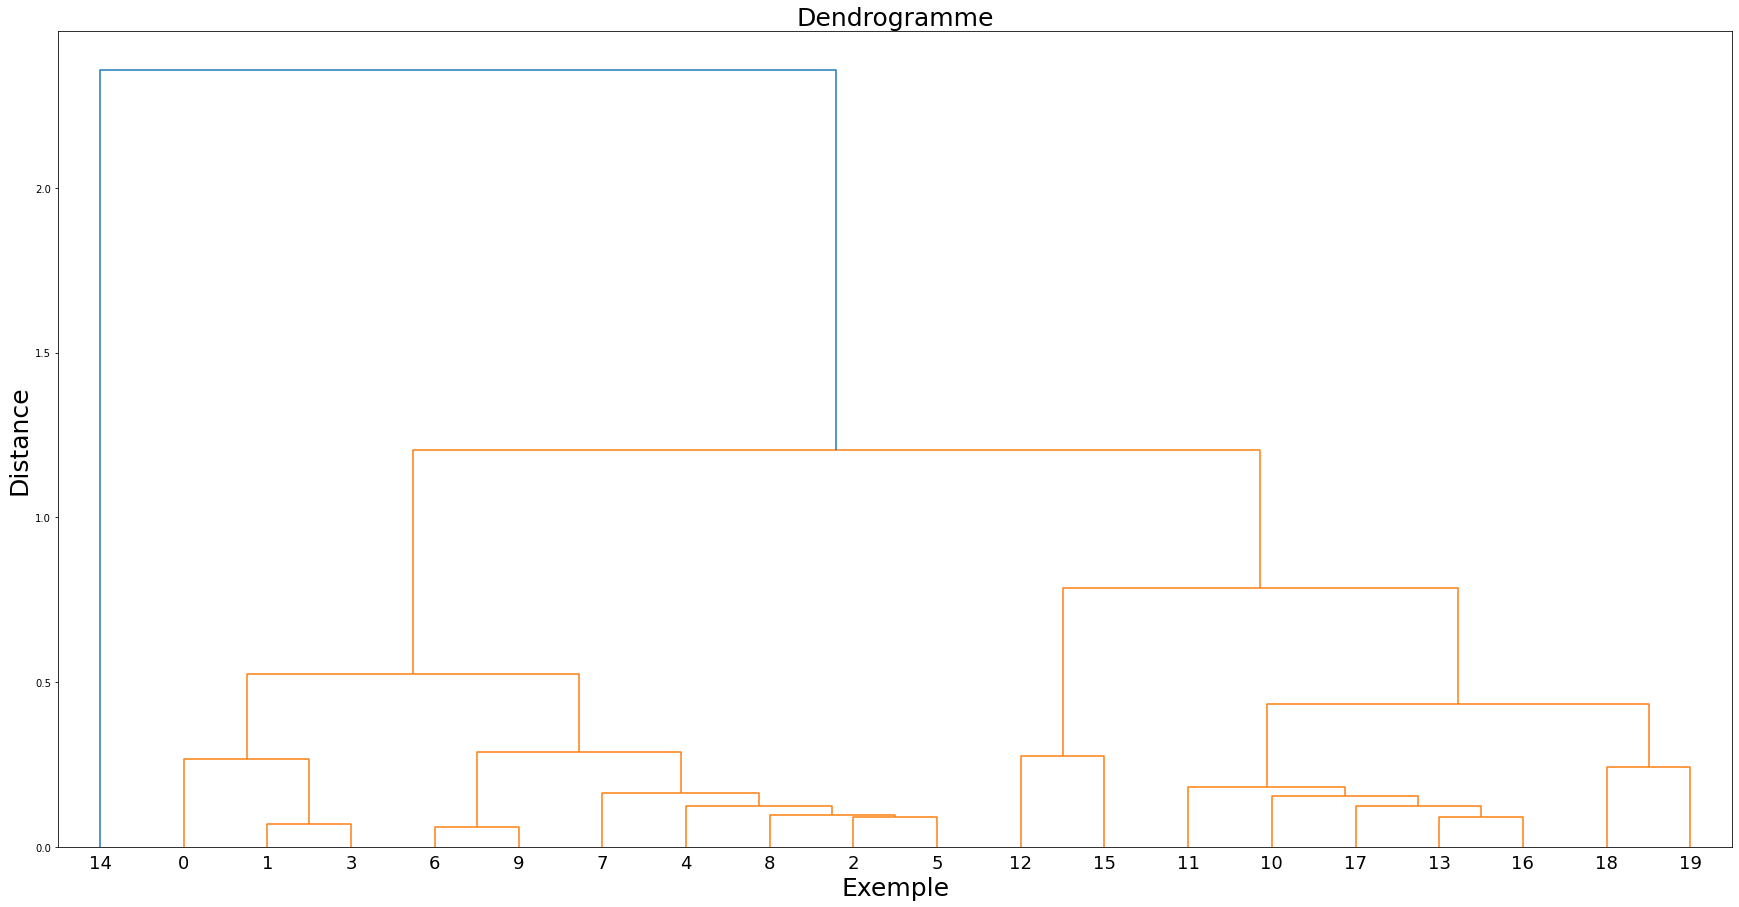

In [57]:
clustering_hierarchique("euclidienne",dataParisReduced)

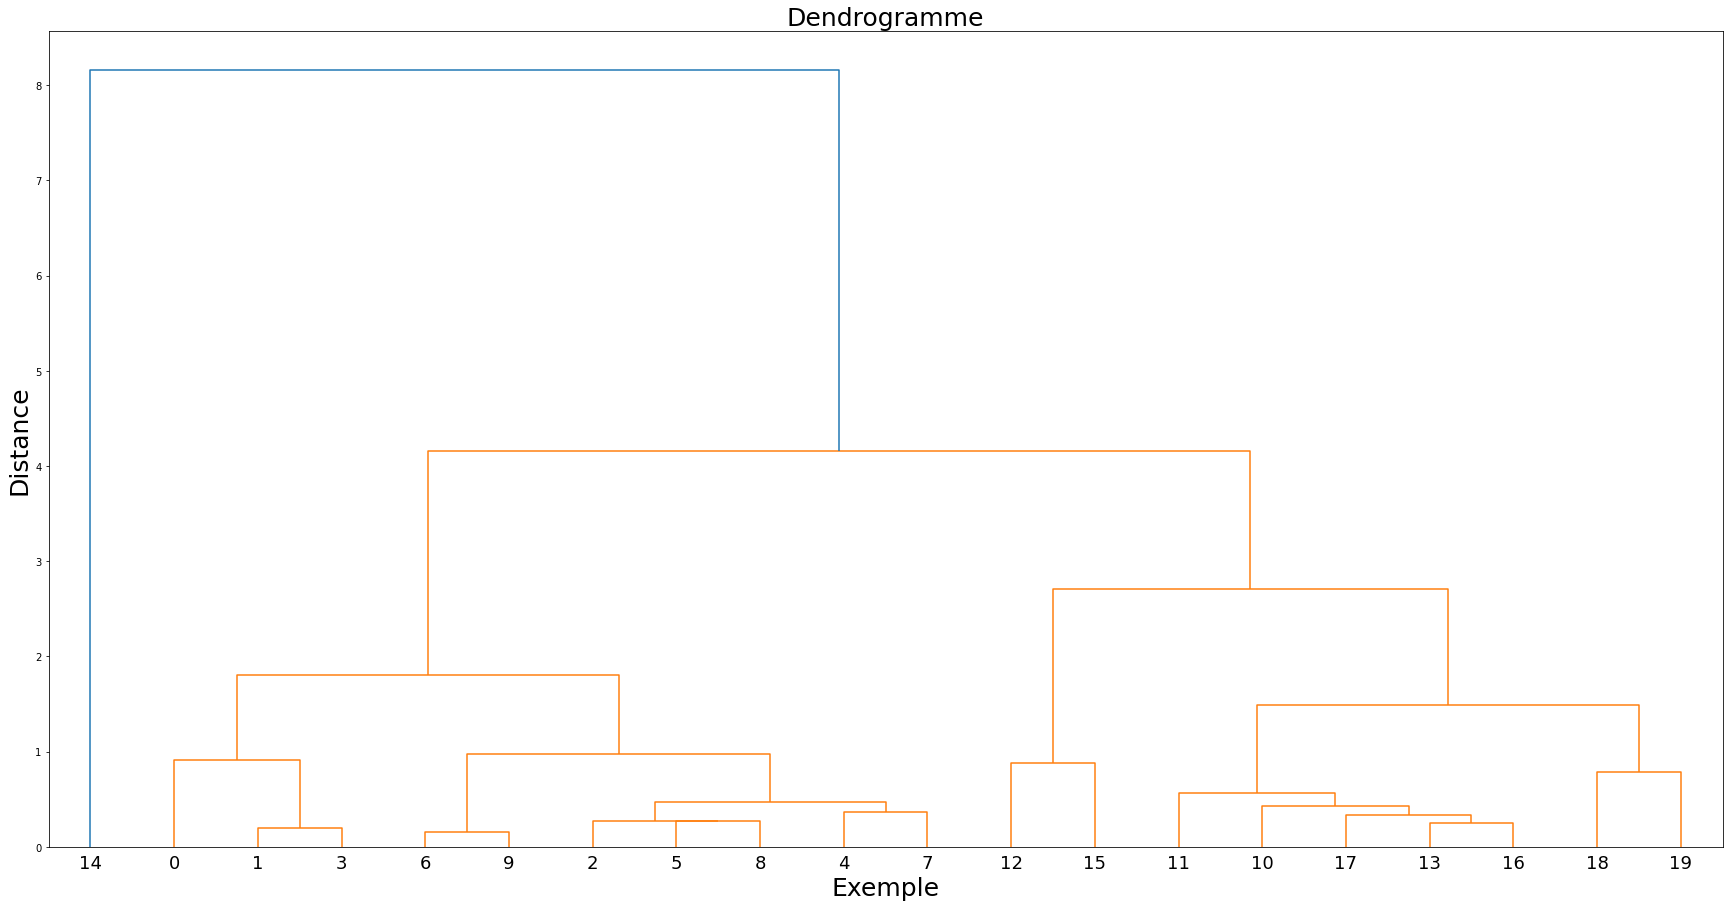

In [58]:
clustering_hierarchique("manhattan",dataParisReduced)

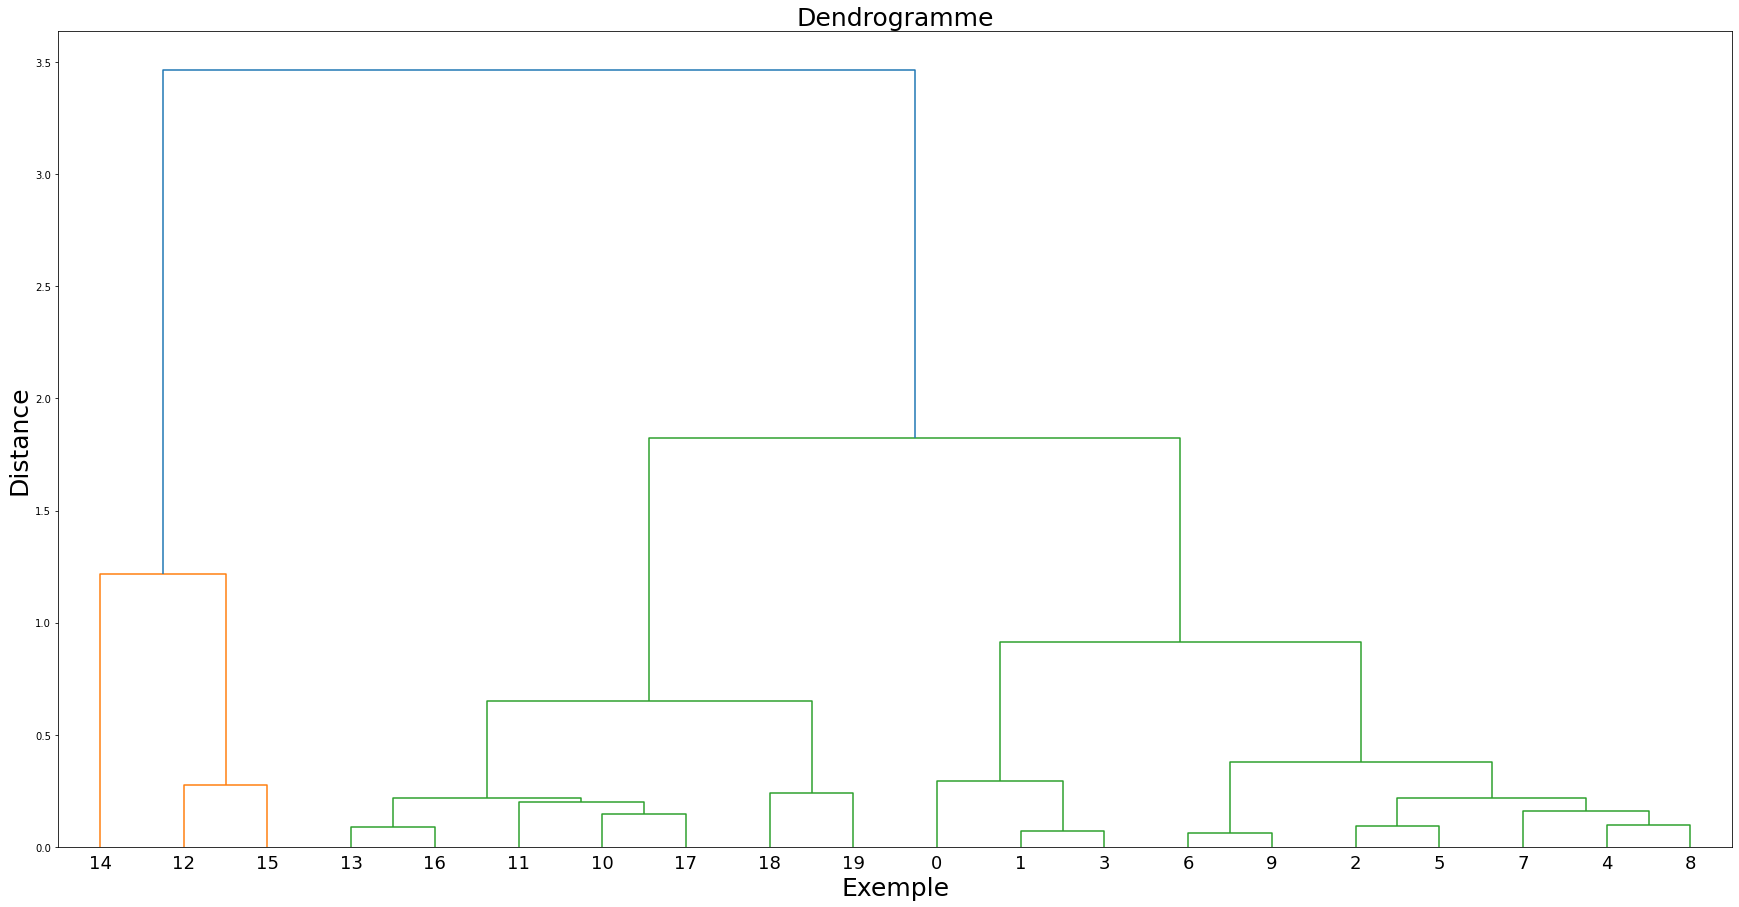

In [63]:
clustering_hierarchique_distMax("euclidienne",dataParisReduced)

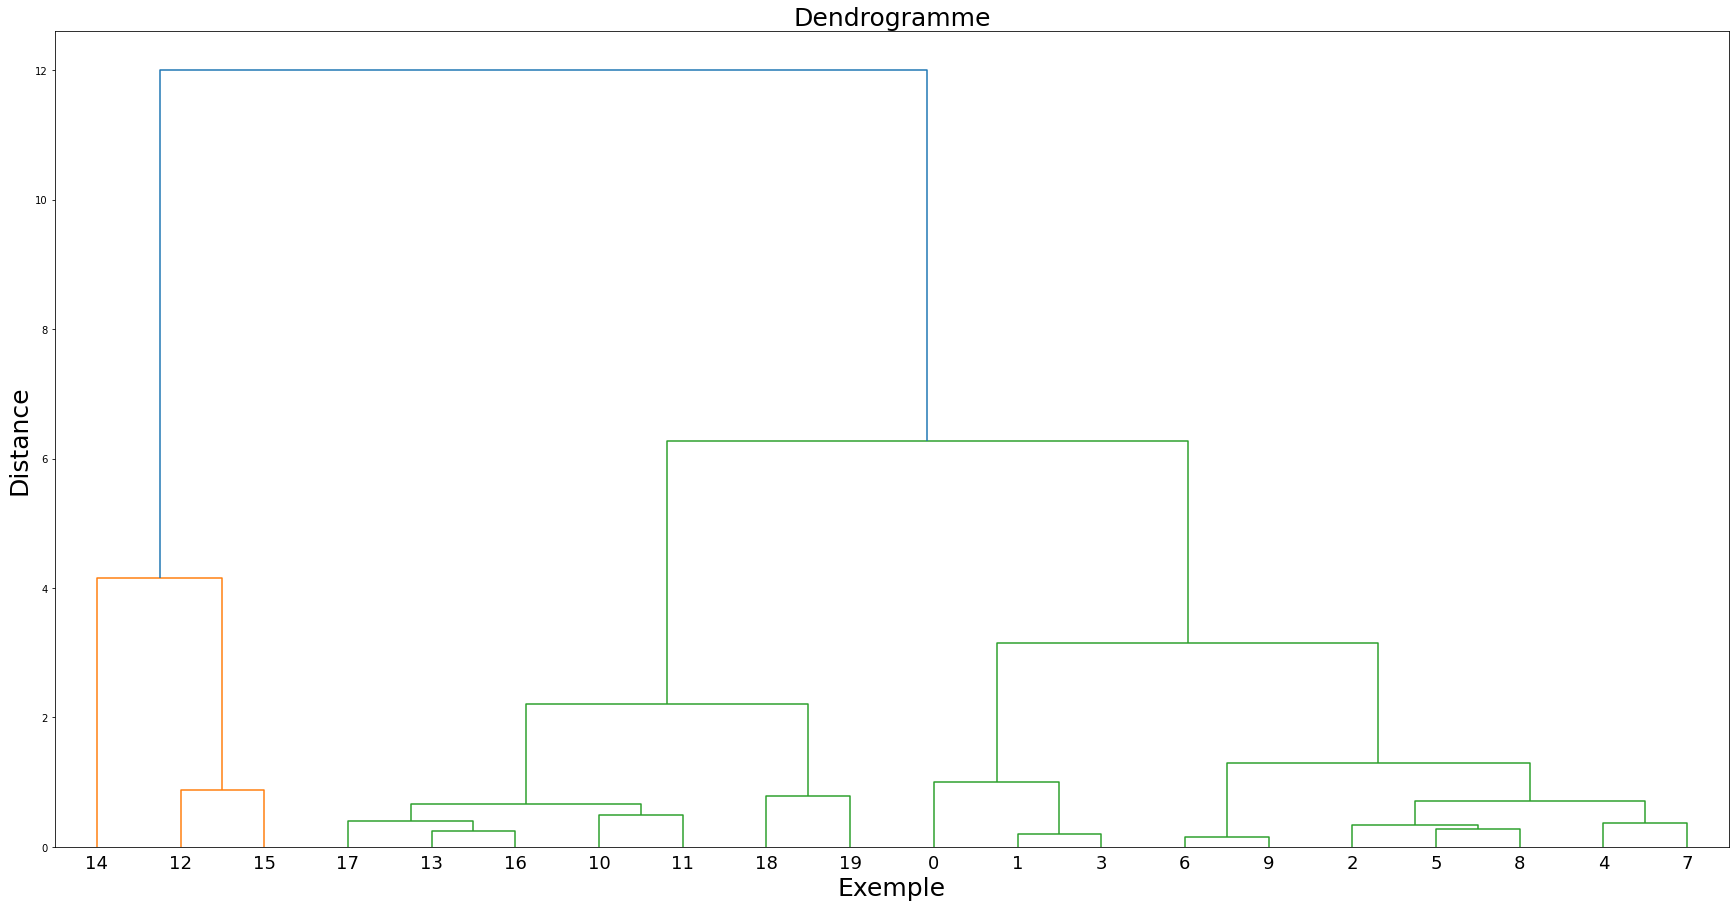

In [64]:
clustering_hierarchique_distMax("manhattan",dataParisReduced)